# AI Lab Assignment -3
# Topic: Apply A* algorithm on Single Shortest Path Problem (SSP)

---

> Name- Rugved Chavan 

> Reg-no- 199303045

> cce sec-A


In [ ]:
print("Hello World!")
!python --version

Hello World!
Python 3.7.12


# Heuristic Search

---

Heuristic search is a type of strategy for finding the optimum solution by searching a solution space. The heuristic here use some mechanism for searching the solution space while determining where the solution is most likely to be found and concentrating the search on that area.

Hill climbing methods, best-first search, A* algorithm, simulated-annealing, and evolutionary algorithms are all examples of heuristic search methods.

This assignment 3 focuses on the A* algorithm, that would be used to solve the Single Shortest Path Problem (SSP).

# Single Source Shortest Path (SSP)

---


The Single-Source Shortest Path (SSSP) problem consists of finding the shortest paths between a given vertex v and all other vertices in the graph.

# A* algorithm

---

A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals.
Informally speaking, unlike other traversal approaches, A* Search algorithms have "brains." What this means is that it is a sophisticated algorithm that distinguishes itself from other algorithms. In the sections below, this truth is clarified in great depth.
It's also worth noting that many games and web-based maps employ this approach to effectively locate the shortest path (approximation).

# Dijkstra's Algorithm

---


Dijkstra's Algorithm works on the basis that any subpath B -> D of the shortest path A -> D between vertices A and D is also the shortest path between vertices B and D.

Djikstra used this property in the opposite direction i.e we overestimate the distance of each vertex from the starting vertex. Then we visit each node and its neighbors to find the shortest subpath to those neighbors.

The algorithm uses a greedy approach in the sense that we find the next best solution hoping that the end result is the best solution for the whole problem.







---


> Problem Statement: Report the cost as number of nodes explored to get the solution. Compare the cost with Dijkstra's Algorithm.

---



# A-Star Code performed in Lab

In [ ]:
i = 0
def aStarAlgo(start_node, stop_node):
        global i
        open_set = set(start_node) 
        closed_set = set()
        g = {} #store distance from starting node
        parents = {}# parents contains an adjacency map of all nodes
 
        #ditance of starting node from itself is zero
        g[start_node] = 0
        #start_node is root node i.e it has no parent nodes
        #so start_node is set to its own parent node
        parents[start_node] = start_node
        
         
         
        while len(open_set) > 0:
            n = None
            
 
            #node with lowest f() is found
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    i= i+1
                    print("Node Instance created:", i)
                    n = v
             
                     
            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    #nodes 'm' not in first and last set are added to first
                    #n is set its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                         
     
                    #for each node m,compare its distance from start i.e g(m) to the
                    #from start through n node
                    else:
                        if g[m] > g[n] + weight:
                            #update g(m)
                            g[m] = g[n] + weight
                            #change parent of m to n
                            parents[m] = n
                             
                            #if m in closed set,remove and add to open
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                path = []
 
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
 
                path.append(start_node)
 
                path.reverse()
 
                print('Path found: {}'.format(path))
                return path
 
 
            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_set.remove(n)
            closed_set.add(n)
 
        print('Path does not exist!')
        return None
         
#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
def heuristic(n):
        H_dist = {
            'A': 11,
            'B': 6,
            'C': 99,
            'D': 1,
            'E': 7,
            'G': 0,
             
        }
 
        return H_dist[n]
 
#Describe your graph here  
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],
     
}
aStarAlgo('A', 'G')

Node Instance created: 1
Node Instance created: 2
Node Instance created: 3
Node Instance created: 4
Node Instance created: 5
Node Instance created: 6
Node Instance created: 7
Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

# Comparision Between A-Star and Dijkstra algorithm by visualizing exploration of new nodes

---


For performance comparision of this algorithms a visual bechmark test is performed for finding the shortest path.

> Requrements: Run the following code on PyCharm or VS-code as this inlcude win files

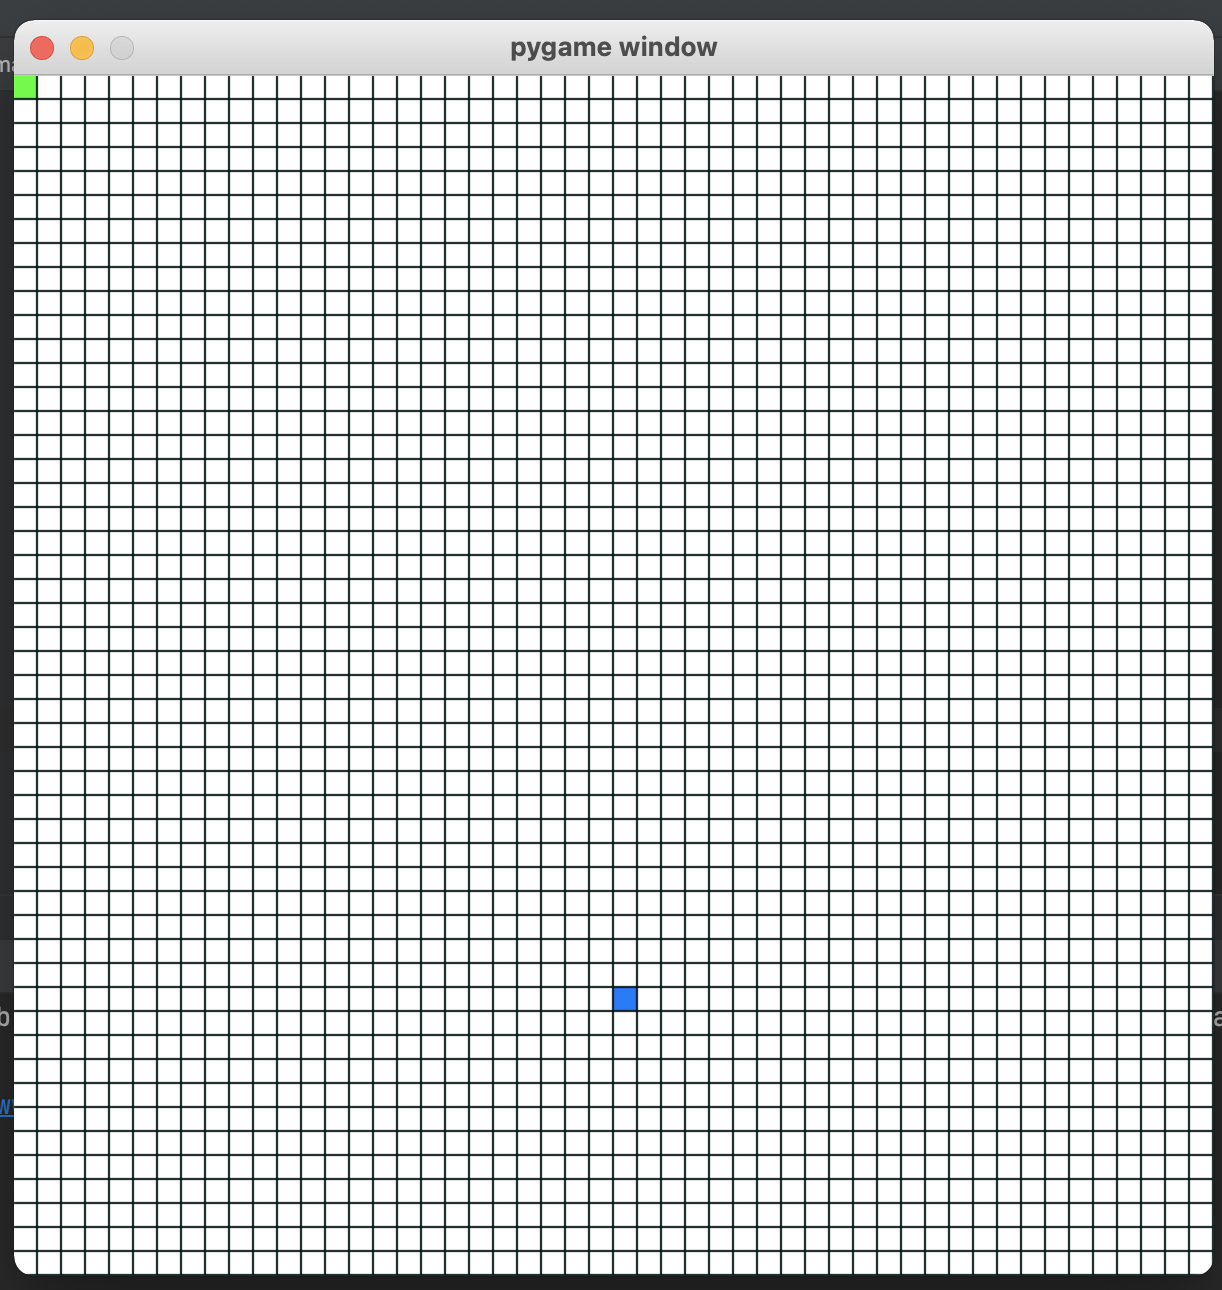

<div>
<img src="attachment:Screenshot 2022-02-14 at 8.03.02 AM.png" height="100"/>
</div>

> How to use:
A green box is the starting postion, blue box is the end postion and white boxes are empty. Click or drag on white boxes to create obstacles indicated by black color box.




---



In [ ]:
!pip3 install pygame

     |████████████████████████████████| 8.9 MB 2.7 MB/s eta 0:00:01


# A-Star Path finding by visualizing exploration of new nodes.

In [ ]:
import pygame, sys, random, math
from tkinter import messagebox, Tk



size = (width, height) = 600, 600

pygame.init()

win = pygame.display.set_mode(size)

clock = pygame.time.Clock()

cols, rows = 50, 50


grid = []
openSet, closeSet = [], []
path = []

w = width//cols
h = height//rows

class Spot:
    def __init__(self, i, j):
        self.x, self.y = i, j
        self.f, self.g, self.h = 0, 0, 0
        self.neighbors = []
        self.prev = None
        self.wall = False
        # if random.randint(0, 100) < 20:
        #     self.wall = True

    def show(self, win, col):
        if self.wall == True:
            col = (0, 0, 0)
        pygame.draw.rect(win, col, (self.x*w, self.y*h, w-1, h-1))

    def add_neighbors(self, grid):
        if self.x < cols - 1:
            self.neighbors.append(grid[self.x+1][self.y])
        if self.x > 0:
            self.neighbors.append(grid[self.x-1][self.y])
        if self.y < rows - 1:
            self.neighbors.append(grid[self.x][self.y+1])
        if self.y > 0:
            self.neighbors.append(grid[self.x][self.y-1])
        #Add Diagonals
        if self.x < cols - 1 and self.y < rows - 1:
            self.neighbors.append(grid[self.x+1][self.y+1])
        if self.x < cols - 1 and self.y > 0:
            self.neighbors.append(grid[self.x+1][self.y-1])
        if self.x > 0 and self.y < rows - 1:
            self.neighbors.append(grid[self.x-1][self.y+1])
        if self.x > 0 and self.y > 0:
            self.neighbors.append(grid[self.x-1][self.y-1])


def clickWall(pos, state):
    i = pos[0] // w
    j = pos[1] // h
    grid[i][j].wall = state

def place(pos):
    i = pos[0] // w
    j = pos[1] // h
    return w, h

def heuristics(a, b):
    return math.sqrt((a.x - b.x)**2 + abs(a.y - b.y)**2)


for i in range(cols):
    arr = []
    for j in range(rows):
        arr.append(Spot(i, j))
    grid.append(arr)

for i in range(cols):
    for j in range(rows):
        grid[i][j].add_neighbors(grid)

start = grid[0][0]
end = grid[cols - cols//2][rows - cols//4]

openSet.append(start)



def close():
    pygame.quit()
    sys.exit()




def main():
    flag = False
    noflag = True
    startflag = False

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                close()
            if event.type == pygame.MOUSEBUTTONUP:
                if pygame.mouse.get_pressed(0):
                    clickWall(pygame.mouse.get_pos(), True)
                if pygame.mouse.get_pressed(2):
                    clickWall(pygame.mouse.get_pos(), False)
            if event.type == pygame.MOUSEMOTION:
                if pygame.mouse.get_pressed()[0]:
                    clickWall(pygame.mouse.get_pos(), True)
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_RETURN:
                    startflag = True

        if startflag:
            if len(openSet) > 0:
                winner = 0
                for i in range(len(openSet)):
                    if openSet[i].f < openSet[winner].f:
                        winner = i

                current = openSet[winner]

                if current == end:
                    temp = current
                    while temp.prev:
                        path.append(temp.prev)
                        temp = temp.prev
                    if not flag:
                        flag = True
                        print("Done")
                    elif flag:
                        continue

                if flag == False:
                    openSet.remove(current)
                    closeSet.append(current)

                    for neighbor in current.neighbors:
                        if neighbor in closeSet or neighbor.wall:
                            continue
                        tempG = current.g + 1

                        newPath = False
                        if neighbor in openSet:
                            if tempG < neighbor.g:
                                neighbor.g = tempG
                                newPath = True
                        else:
                            neighbor.g = tempG
                            newPath = True
                            openSet.append(neighbor)

                        if newPath:
                            neighbor.h = heuristics(neighbor, end)
                            neighbor.f = neighbor.g + neighbor.h
                            neighbor.prev = current

            else:
                if noflag:
                    Tk().wm_withdraw()
                    messagebox.showinfo("No Solution", "There was no solution" )
                    noflag = False

        win.fill((0, 20, 20))
        for i in range(cols):
            for j in range(rows):
                spot = grid[j][i]
                spot.show(win, (255, 255, 255))
                if flag and spot in path:
                    spot.show(win, (25, 120, 250))
                elif spot in closeSet:
                    spot.show(win, (255, 0, 0))
                elif spot in openSet:
                    spot.show(win, (0, 255, 0))
                try:
                    if spot == end:
                        spot.show(win, (0, 120, 255))
                except Exception:
                    pass

        pygame.display.flip()



main()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Done


SystemExit: 

# Output
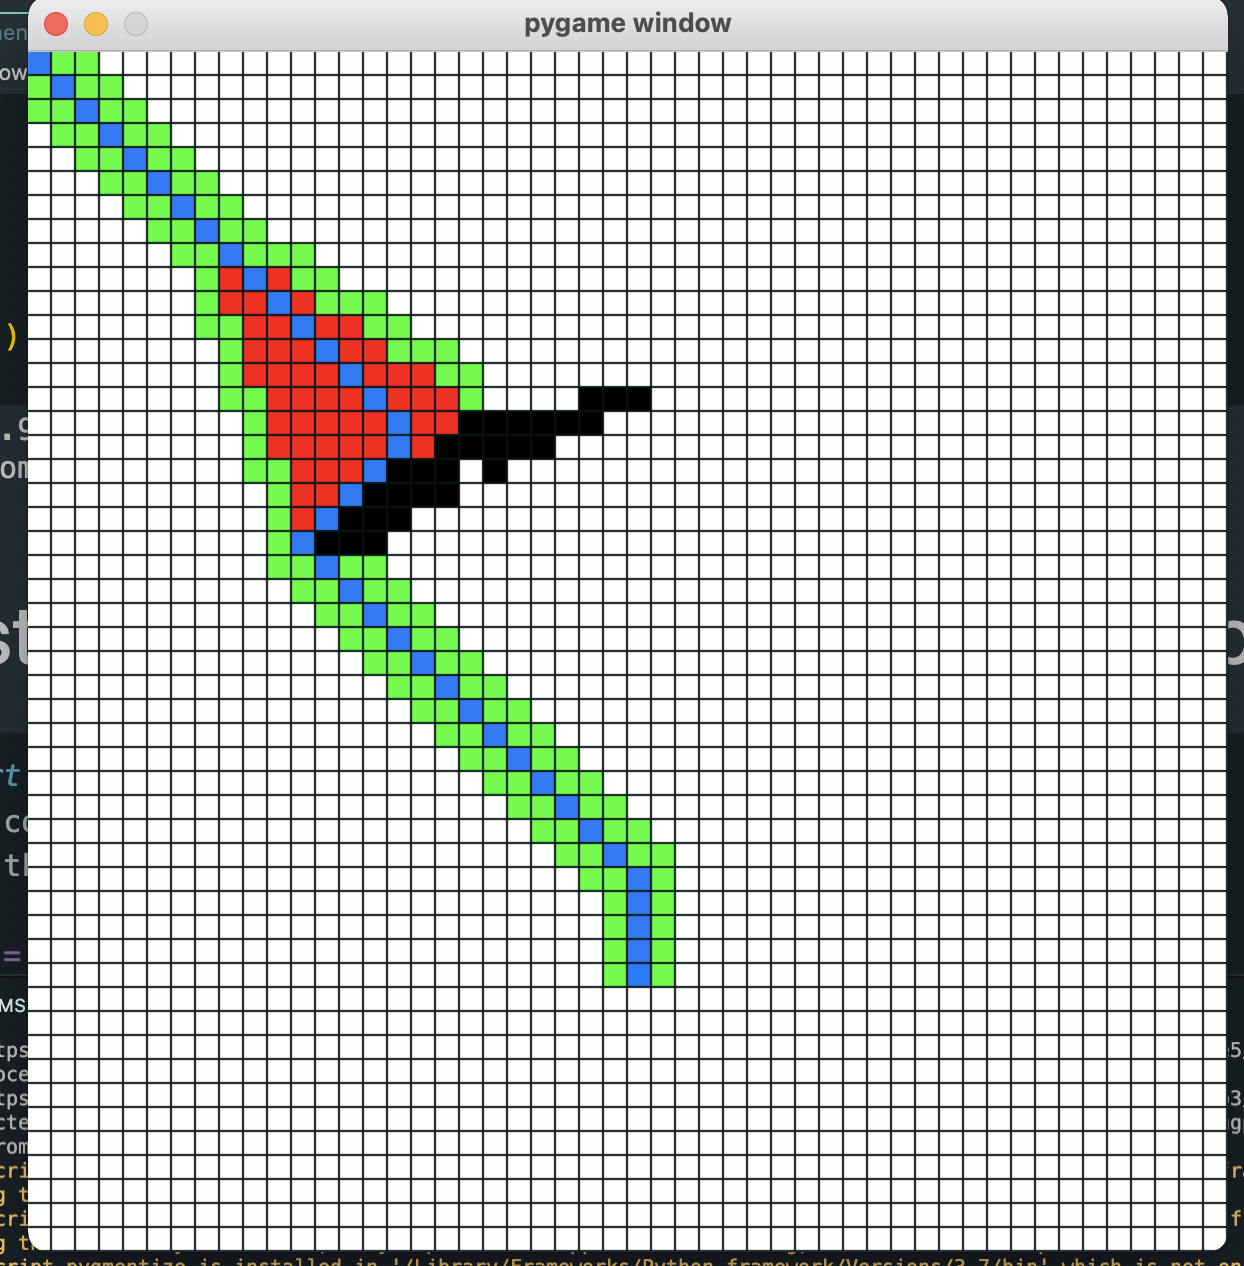

# Djikstra's Path Finding by visualizing exploration of new nodes.

In [ ]:
import pygame, sys, random, math
from collections import deque
from tkinter import messagebox, Tk

size = (width, height) = 640, 480
pygame.init()

win = pygame.display.set_mode(size)
pygame.display.set_caption("Dijktdtra's Path Finding")
clock = pygame.time.Clock()

cols, rows = 64, 48

w = width//cols
h = height//rows

grid = []
queue, visited = deque(), []
path = []

class Spot:
    def __init__(self, i, j):
        self.x, self.y = i, j
        self.f, self.g, self.h = 0, 0, 0
        self.neighbors = []
        self.prev = None
        self.wall = False
        self.visited = False
        if (i+j)%7 == 0:
            self.wall == True
        # if random.randint(0, 100) < 20:
        #     self.wall = True
        
    def show(self, win, col, shape= 1):
        if self.wall == True:
            col = (0, 0, 0)
        if shape == 1:
            pygame.draw.rect(win, col, (self.x*w, self.y*h, w-1, h-1))
        else:
            pygame.draw.circle(win, col, (self.x*w+w//2, self.y*h+h//2), w//3)
    
    def add_neighbors(self, grid):
        if self.x < cols - 1:
            self.neighbors.append(grid[self.x+1][self.y])
        if self.x > 0:
            self.neighbors.append(grid[self.x-1][self.y])
        if self.y < rows - 1:
            self.neighbors.append(grid[self.x][self.y+1])
        if self.y > 0:
            self.neighbors.append(grid[self.x][self.y-1])
        #Add Diagonals
        # if self.x < cols - 1 and self.y < rows - 1:
        #     self.neighbors.append(grid[self.x+1][self.y+1])
        # if self.x < cols - 1 and self.y > 0:
        #     self.neighbors.append(grid[self.x+1][self.y-1])
        # if self.x > 0 and self.y < rows - 1:
        #     self.neighbors.append(grid[self.x-1][self.y+1])
        # if self.x > 0 and self.y > 0:
        #     self.neighbors.append(grid[self.x-1][self.y-1])


def clickWall(pos, state):
    i = pos[0] // w
    j = pos[1] // h
    grid[i][j].wall = state

def place(pos):
    i = pos[0] // w
    j = pos[1] // h
    return w, h

for i in range(cols):
    arr = []
    for j in range(rows):
        arr.append(Spot(i, j))
    grid.append(arr)

for i in range(cols):
    for j in range(rows):
        grid[i][j].add_neighbors(grid)

    
start = grid[0][0]
end = grid[cols - cols//2][rows - cols//4]
start.wall = False
end.wall = False

queue.append(start)
start.visited = True

def main():
    flag = False
    noflag = True
    startflag = False

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == pygame.MOUSEBUTTONDOWN:
                if event.button in (1, 3):  
                    clickWall(pygame.mouse.get_pos(), event.button==1)
            elif event.type == pygame.MOUSEMOTION:
                if event.buttons[0] or event.buttons[2]:
                    clickWall(pygame.mouse.get_pos(), event.buttons[0])
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_RETURN:
                    startflag = True

        if startflag:
            if len(queue) > 0:
                current = queue.popleft()
                if current == end:
                    temp = current
                    while temp.prev:
                        path.append(temp.prev)
                        temp = temp.prev 
                    if not flag:
                        flag = True
                        print("Done")
                    elif flag:
                        continue
                if flag == False:
                    for i in current.neighbors:
                        if not i.visited and not i.wall:
                            i.visited = True
                            i.prev = current
                            queue.append(i)
            else:
                if noflag and not flag:
                    Tk().wm_withdraw()
                    messagebox.showinfo("No Solution", "There was no solution" )
                    noflag = False
                else:
                    continue


        win.fill((0, 20, 20))
        for i in range(cols):
            for j in range(rows):
                spot = grid[i][j]
                spot.show(win, (44, 62, 80))
                if spot in path:
                    spot.show(win, (46, 204, 113))
                    spot.show(win, (192, 57, 43), 0)
                elif spot.visited:
                    spot.show(win, (39, 174, 96))
                if spot in queue and not flag:
                    spot.show(win, (44, 62, 80))
                    spot.show(win, (39, 174, 96), 0)
                if spot == start:
                    spot.show(win, (0, 255, 200))
                if spot == end:
                    spot.show(win, (0, 120, 255))
                
                
        pygame.display.flip()


main()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Done


SystemExit: 

Output:
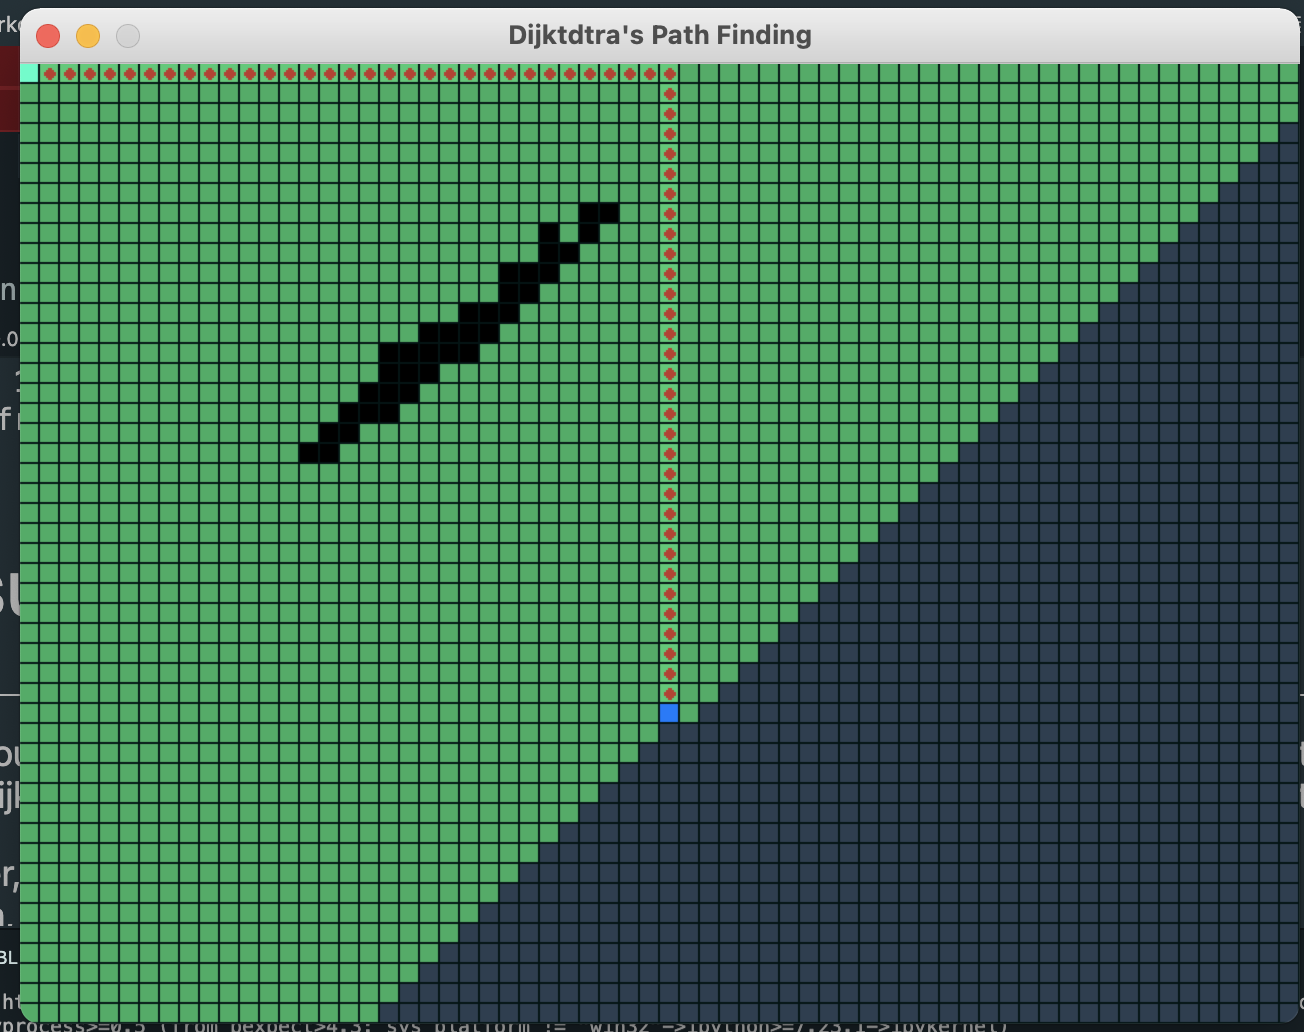

# Results & Conclusion:

---


Even though Dijkstra's algorithm and the A* algorithm both find the same shortest paths, the A* algorithm does it almost 60 times faster! While Dijkstra's algorithm produced the output after 12649 iterations, it only took 217 for the A* algotithm.

However, it should be noted that the efficiency of the A* algorithm is highly dependent on its evaluation function, and with the wrong function, the results could be even worse than Dijkstra.

To sum it all up, given that we have a good heuristic guess on our problem, it is definitely more efficient to use the A* algorithm compared to Dijkstra's algorithm, although this won't always be the case as it can be highly dependent on the problem at hand.

Thankyou:
Auther: Rugved Chavan

# Reference

---

[1] https://www.lancaster.ac.uk/stor-i-student-sites/matthew-randall/2020/04/01/heuristic-search-part-1-introduction-and-basic-search-methods/#:~:text=Heuristic%20search%20is%20class%20of,the%20search%20on%20that%20area.

[2] https://www.geeksforgeeks.org/a-search-algorithm/

[3] https://link.springer.com/referenceworkentry/10.1007/978-1-4419-9863-7_875#:~:text=Several%20commonly%20used%20heuristic%20search,(Russell%20and%20Norvig%202003).

[4] https://stackabuse.com/dijkstras-algorithm-vs-a-algorithm/